In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reddit = pd.read_csv('reddit_wsb.csv')
reddit.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


## Aggregate the timestamp

In [3]:
reddit['date'] = pd.to_datetime(reddit.timestamp).dt.date
reddit['hour'] = pd.to_datetime(reddit.timestamp).dt.hour
reddit['dayOfWeek'] = pd.to_datetime(reddit['timestamp']).dt.day_name()

In [4]:
reddit.head()

,title,score,id,url,comms_num,created,body,timestamp,date,hour,dayOfWeek
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,Thursday
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,Thursday
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,Thursday
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,Thursday
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,Thursday


## Get total post per day

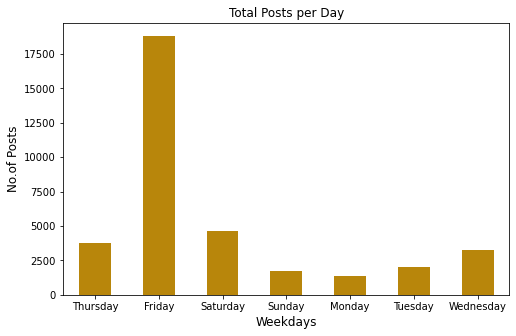

In [5]:
reddit_day = reddit['dayOfWeek']

plt.figure(figsize=(8,5))
reddit_day = reddit_day.groupby(reddit_day,sort=False).count().plot.bar(color='darkgoldenrod')
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("No.of Posts", fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Total Posts per Day', fontsize=12)
plt.show()

## Cleaning data

In [6]:
title_reddit = reddit[['title']].dropna()
body_reddit = reddit[['body']].dropna()

In [7]:
title_reddit

,title
0,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...
2,Exit the system
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC..."
...,...
35595,Movies are Back in NY
35596,"Instructions unclear, bought more GME"
35597,Tomorrow Square will beat its consensus gross ...
35598,AMC GAIN LETS DO GAMESTOP NUMBERS BOOOOYS 🚀🚀🚀


In [8]:
body_reddit

,body
2,The CEO of NASDAQ pushed to halt trading “to g...
6,Hedgefund whales are spreading disinfo saying ...
7,Life isn't fair. My mother always told me that...
10,I believe right now is one of those rare oppo...
12,You guys are champs. GME... who would have tho...
...,...
35582,"Disclaimer: I'm an idiot, who despite starting..."
35589,Whats good retards. I know there's been a few ...
35594,How are none of you autists talking about the...
35597,Square's business segment has seen a dramatic ...


In [9]:
def cleantext(text):
    # make lower case
    text = str(text).lower()
    # remove square in brackets
    text = re.sub('\[.*?\]', ' ', text)
    # remove URLs
    text = re.sub(r"http\S+", ' ', text)
    # remove punctuation
    text = re.sub('<.*?>+', ' ', text)
    # remove handlers
    text = re.sub('@[^\s]+', ' ', text)
    # remove all special characters
    text = ' '.join(re.findall(r'\w+', text))
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
    # replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

In [10]:
title_reddit['title'] = title_reddit['title'].apply(cleantext)
body_reddit['body'] = body_reddit['body'].apply(cleantext)

## Stemming

In [11]:
import nltk

In [12]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [13]:
title_reddit['title'] = title_reddit['title'].apply(stemming)
body_reddit['body'] = body_reddit['body'].apply(stemming)

## Get sentiment values for title and body posts 

In [14]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
title_reddit['title_values'] = title_reddit['title'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_reddit['body_values'] = body_reddit['body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [16]:
def sent_value(text):
    if text['compound']>0:
        return 'Positive'
    elif text['compound']<0:
        return 'Negative'
    else:
        return 'Neutral'

title_reddit['title_sentiments'] = title_reddit['title_values'].apply(lambda x: sent_value(x))
body_reddit['body_sentiments'] = body_reddit['body_values'].apply(lambda x: sent_value(x))

In [17]:
title_reddit.head()

,title,title_values,title_sentiments
0,it not about the money it about send messag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,math professor scott steiner say the number sp...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",Positive
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,new sec file for gme can someon less retard th...,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...",Negative
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",Positive


In [18]:
body_reddit.head()

,body,body_values,body_sentiments
2,the ceo of nasdaq push to halt trade to give i...,"{'neg': 0.052, 'neu': 0.87, 'pos': 0.078, 'com...",Positive
6,hedgefund whale are spread disinfo say friday ...,"{'neg': 0.09, 'neu': 0.885, 'pos': 0.025, 'com...",Negative
7,life isn fair my mother alway told me that whe...,"{'neg': 0.144, 'neu': 0.785, 'pos': 0.071, 'co...",Negative
10,i believ right now is one of those rare opport...,"{'neg': 0.083, 'neu': 0.792, 'pos': 0.125, 'co...",Positive
12,you guy are champ gme who would have thought b...,"{'neg': 0.077, 'neu': 0.804, 'pos': 0.118, 'co...",Positive


## Plot setiments for title and body posts

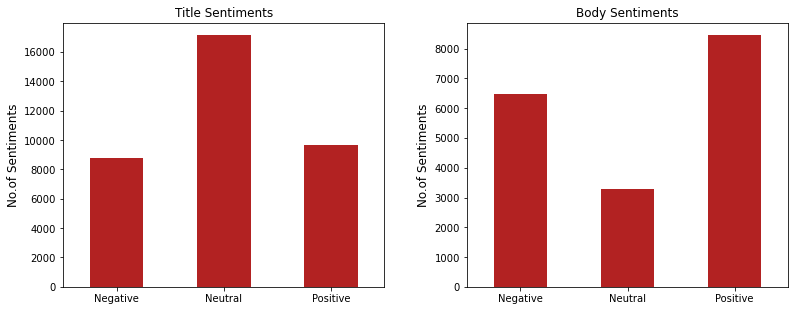

In [19]:
fig, axr = plt.subplots(1,2, figsize=(12, 6))

title_reddit['title_sentiments'].value_counts().sort_index().plot.bar(ax=axr[0], color='firebrick')
ax=axr[0].set_title("Title Sentiments", fontsize=12)

body_reddit['body_sentiments'].value_counts().sort_index().plot.bar(ax=axr[1], color='firebrick')
ax=axr[1].set_title("Body Sentiments", fontsize=12)

fig.tight_layout(pad=5.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation='horizontal')
    plt.ylabel("No.of Sentiments", fontsize=12)

## Token Visualization

In [20]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [21]:
# FOR TITLE POSTS
title_text = " ".join(review for review in title_reddit['title'])
print ("There are {} words in the combination of all posts.".format(len(title_text)))

There are 1818331 words in the combination of all posts.


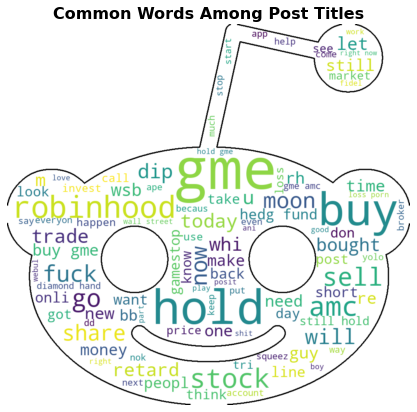

In [28]:
reddit_mask = np.array(Image.open("reddit.png"))
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(title_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Titles',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

In [23]:
# FOR BODY POSTS
body_text = " ".join(review for review in body_reddit['body'])
print ("There are {} words in the combination of all post bodies.".format(len(body_text)))

There are 12134472 words in the combination of all post bodies.


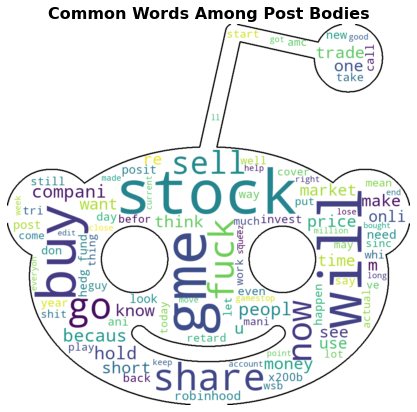

In [29]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(body_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Bodies',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

### Common words for each sentiments in post titles

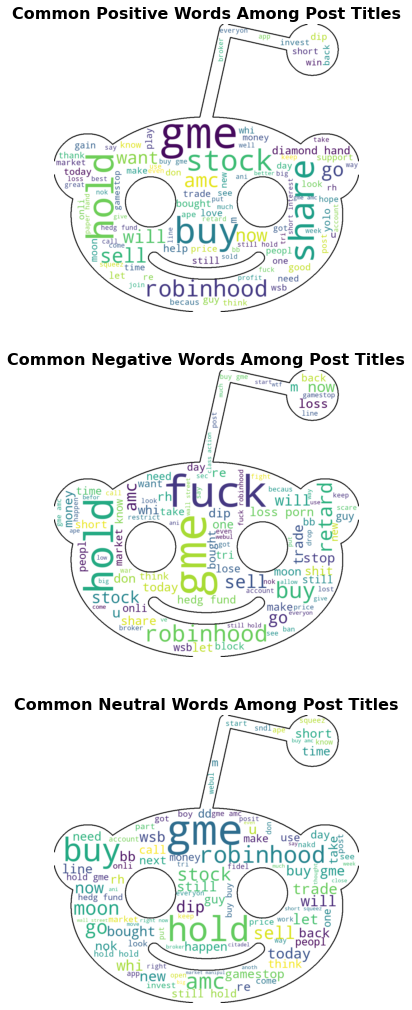

In [25]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    titleSent = title_reddit[title_reddit['title_sentiments']==sentiments[i]]['title']
    titleText = ' '.join(titleSent)
    
    wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3).generate(titleText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Titles',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()
    

### Common words for each sentiments in post bodies

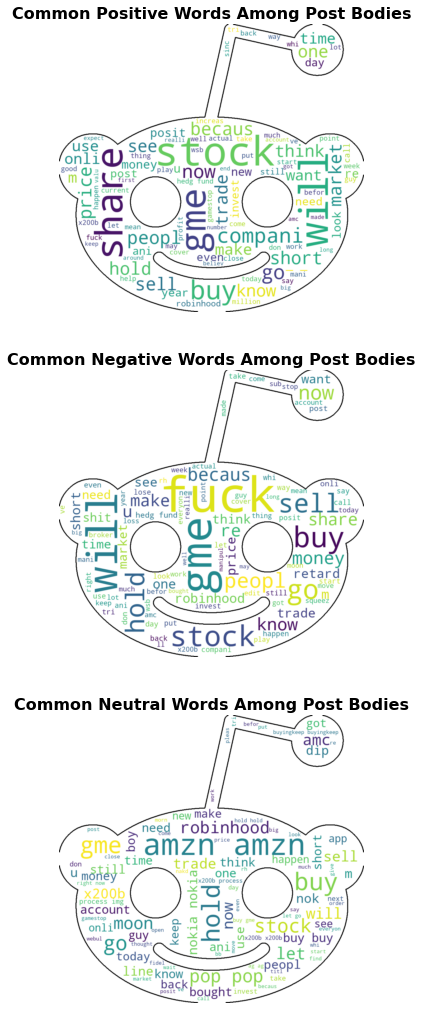

In [26]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    bodySent = body_reddit[body_reddit['body_sentiments']==sentiments[i]]['body']
    bodyText = ' '.join(bodySent)
    
    wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3).generate(bodyText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Bodies',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()

#### Cont...